In [1]:
# use pydsstools to read DSS file from HEC-HMS
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
from pydsstools.heclib.dss import HecDss
from pydsstools.heclib.dss.HecDss import Open

In [3]:
gage_name = ['Partridge_Rd','Midway_Rd','Hwy_PP','Hwy_G',"Bower_Creek","Willow_Creek",
            "Baird_Creek","N_Baird_St","HWy_57"]

<Figure size 1440x432 with 0 Axes>

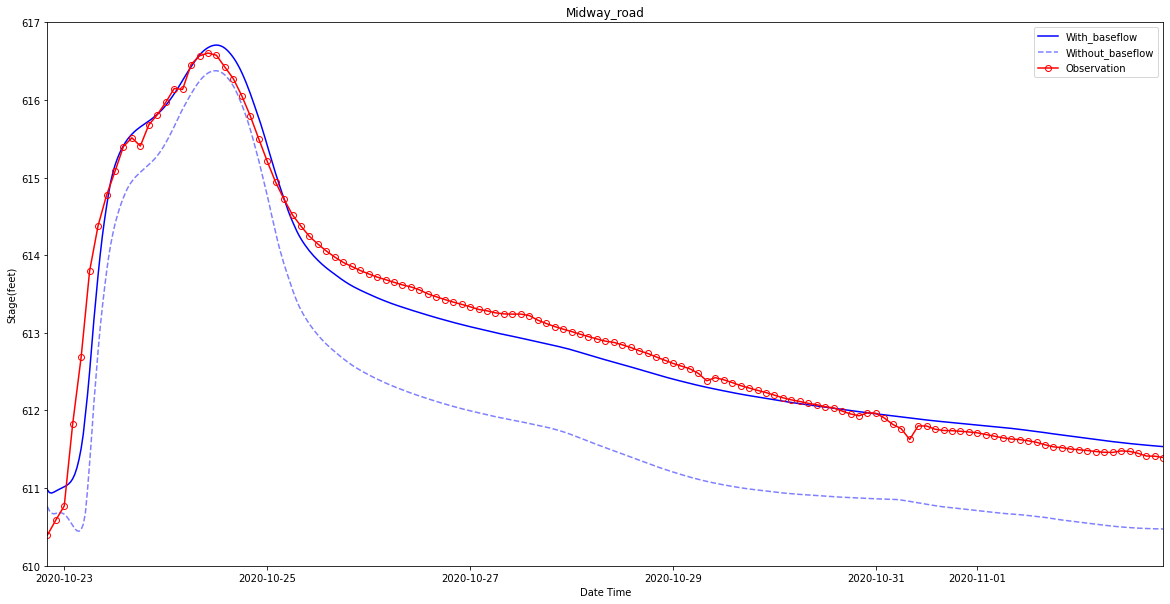

In [80]:
# extract observations
obs_folder = r"D:\East_river_flood_resilience\Greenbay\HEC-RAS\Unsteady_flow\Unsteady_flow_data\East_river_gage_oct_2020_0514"
ax = plt.figure(figsize = (20, 6))
obs_loc = obs_folder + "\\" + "Midway_Rd" + "_adjusted.csv"
gage_data = pd.read_csv(obs_loc)
# create timestamp index
time_index = []
for i in range(gage_data.shape[0]):
    d = datetime.strptime(gage_data['Date_Time'][i], "%Y-%m-%d %H:%M:%S")
    time_index.append(d)
gage_data.index = time_index
# resample to 1H 
resampled_gage = gage_data['Stage(ft)'].resample('2H').mean()
resampled_timestamp = resampled_gage.index
# extract Midway road 104916 for calibrated results
fid = HecDss.Open(folder + "//" + dss_name)
pathname = "/EAST MID_G/104916/STAGE/01OCT2020/30MIN/0515_CALIBRATE//EAST MID_G/104916/STAGE/01NOV2020/30MIN/0515_CALIBRATE/"
#  //BAIRD/FLOW/01NOV2020/15MIN/RUN:OCT_22_EVENT/
ts = fid.read_ts(pathname,window = (startDate, endDate), trim_missing = True)
times = np.array(ts.pytimes)
values = ts.values
fid.close()
# extract Midway road 104916 for no base flow results
fid_nobase = HecDss.Open(folder + "//" + dss_name_nobase)
pathname_nobase = "/EAST MID_G/104916/STAGE/01OCT2020/30MIN/PLAN 57//EAST MID_G/104916/STAGE/01NOV2020/30MIN/PLAN 57/"
ts_nobase = fid_nobase.read_ts(pathname_nobase,window = (startDate, endDate), trim_missing = True)
times_nobase = np.array(ts_nobase.pytimes)
values_nobase = ts_nobase.values

plt.figure(figsize = (20, 10))
plt.plot(times[~ts.nodata],values[~ts.nodata],"-",color = 'blue', label = 'With_baseflow')
plt.plot(times_nobase[~ts_nobase.nodata],values_nobase[~ts_nobase.nodata],"--", color = 'blue', alpha = 0.5, label = 'Without_baseflow')
plt.title("Midway_road")
plt.plot(resampled_timestamp, resampled_gage, ls = '-', marker = "o", color = 'r', fillstyle = 'none', markeredgecolor = 'r', label= 'Observation')
# plt.plot(resampled_timestamp, resampled_gage, color = 'r')
plt.axis([datetime(2020,10,22,20,0), datetime(2020,11,2,20,0), 610, 617])
plt.xlabel('Date Time')
plt.ylabel('Stage(feet)')
plt.legend()
plt.show()

In [5]:
# compare simulation  and observation
# gage_name: use to extract observation
# fid：dss file with base flow
# pathname: pathname for crosssection in the dss file
# fid_nobase: dss file without base flow
# y_min: y axis min
# y_max: y axis max
def stage_comparison(gage_name, fid, pathname, fid_nobase, pathname_nobase, startDate, endDate, y_min, y_max):
    # 提取observations
    obs_folder = r"D:\East_river_flood_resilience\Greenbay\HEC-RAS\Unsteady_flow\Unsteady_flow_data\East_river_gage_oct_2020_0514"
    ax = plt.figure(figsize = (20, 6))
    obs_loc = obs_folder + "\\" + gage_name + "_adjusted.csv"
    gage_data = pd.read_csv(obs_loc)
    # create timestamp index
    time_index = []
    for i in range(gage_data.shape[0]):
        d = datetime.strptime(gage_data['Date_Time'][i], "%Y-%m-%d %H:%M:%S")
        time_index.append(d)
    gage_data.index = time_index
    # resample to 1H
    resampled_gage = gage_data['Stage(ft)'].resample('1H').mean()
    resampled_timestamp = resampled_gage.index
    #  //BAIRD/FLOW/01NOV2020/15MIN/RUN:OCT_22_EVENT/
    ts = fid.read_ts(pathname,window = (startDate, endDate), trim_missing = True)
    times = np.array(ts.pytimes)
    values = ts.values
    fid.close() # close DSS
    # extract Midway road 104916 for no base flow results
    ts_nobase = fid_nobase.read_ts(pathname_nobase,window = (startDate, endDate), trim_missing = True)
    times_nobase = np.array(ts_nobase.pytimes)
    values_nobase = ts_nobase.values
    # save simulation data with baseflow without baseflow
    simulations = pd.DataFrame()
    simulations['Time'] = times
    simulations['Stage with baseflow (ft)'] = values
    simulations['Stage without baseflow (ft)'] = values_nobase
    plt.figure(figsize = (20, 10))
    plt.plot(times[~ts.nodata],values[~ts.nodata],"-",color = 'blue', label = 'With_lateral_flow')
    plt.plot(times_nobase[~ts_nobase.nodata],values_nobase[~ts_nobase.nodata],"--", color = 'blue', alpha = 0.5, label = 'Without_lateral_flow')
    plt.title(gage_name)
    plt.plot(resampled_timestamp, resampled_gage, ls = '-', marker = "o", color = 'r', fillstyle = 'none', markeredgecolor = 'r', label= 'Observation')
    # plt.plot(resampled_timestamp, resampled_gage, color = 'r')
    plt.axis([datetime(2020,10,22,20,0), datetime(2020,11,2,20,0), y_min, y_max])
    plt.xlabel('Date Time')
    plt.ylabel('Stage(feet)')
    plt.legend()
    plt.show()
    # return observation, stage with base, stage without base
    return gage_data, simulations 

<Figure size 1440x432 with 0 Axes>

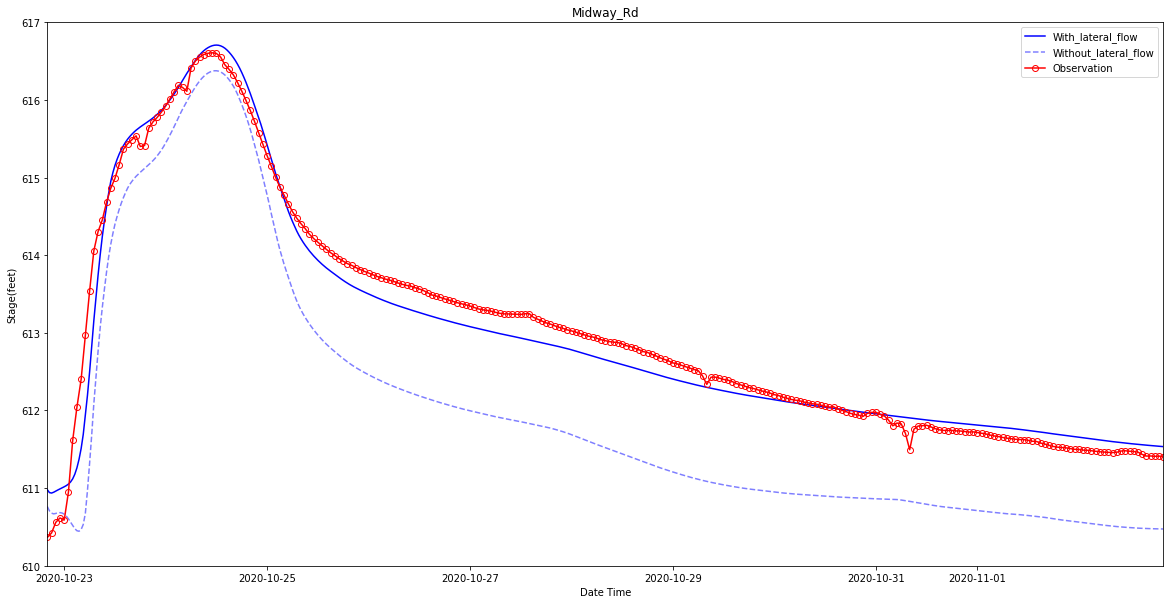

In [6]:
# extract and compare midway gage
# Midway road 104916 for calibrated results
# dss file folder
folder = r"d:\East_river_flood_resilience\Greenbay\HEC-RAS\Calibration\full_east_river"
dss_name = "full_east_river_051.dss" # dss file name
dss_name_nobase = "full_east_river_051_nobase.dss" # dss with no base flow
fid = HecDss.Open(folder + "//" + dss_name)
pathname = "/EAST MID_G/104916/STAGE/01OCT2020/30MIN/0515_CALIBRATE//EAST MID_G/104916/STAGE/01NOV2020/30MIN/0515_CALIBRATE/"
fid_nobase = HecDss.Open(folder + "//" + dss_name_nobase)
pathname_nobase = "/EAST MID_G/104916/STAGE/01OCT2020/30MIN/PLAN 57//EAST MID_G/104916/STAGE/01NOV2020/30MIN/PLAN 57/"
startDate = "22OCT2020 00:00:00"
endDate = "03NOV2020 00:00:00"
y_min = 610
y_max = 617
gage_data, simulations = stage_comparison("Midway_Rd", fid, pathname, fid_nobase, pathname_nobase, startDate, endDate, y_min, y_max)

<Figure size 1440x432 with 0 Axes>

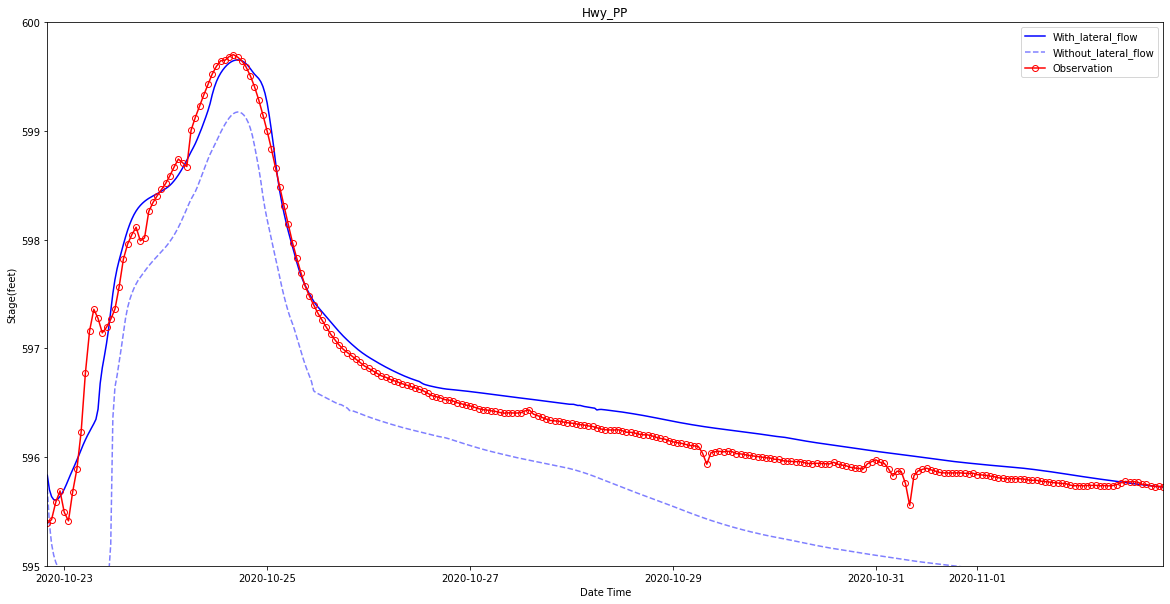

In [7]:
# Hwy PP 80741 for calibrated results
# dss file folder
folder = r"d:\East_river_flood_resilience\Greenbay\HEC-RAS\Calibration\full_east_river"
dss_name = "full_east_river_051.dss" # dss file name
dss_name_nobase = "full_east_river_051_nobase.dss" # dss with no base flow
fid = HecDss.Open(folder + "//" + dss_name)
pathname = "/EAST MID_G/80741/STAGE/01OCT2020/30MIN/0515_CALIBRATE//EAST MID_G/80741/STAGE/01NOV2020/30MIN/0515_CALIBRATE/"
fid_nobase = HecDss.Open(folder + "//" + dss_name_nobase)
pathname_nobase = "/EAST MID_G/80741/STAGE/01OCT2020/30MIN/PLAN 57//EAST MID_G/80741/STAGE/01NOV2020/30MIN/PLAN 57/"
startDate = "22OCT2020 00:00:00"
endDate = "03NOV2020 00:00:00"
y_min = 595
y_max = 600
gage_data, simulations = stage_comparison("Hwy_PP", fid, pathname, fid_nobase, pathname_nobase, startDate, endDate, y_min, y_max)

<Figure size 1440x432 with 0 Axes>

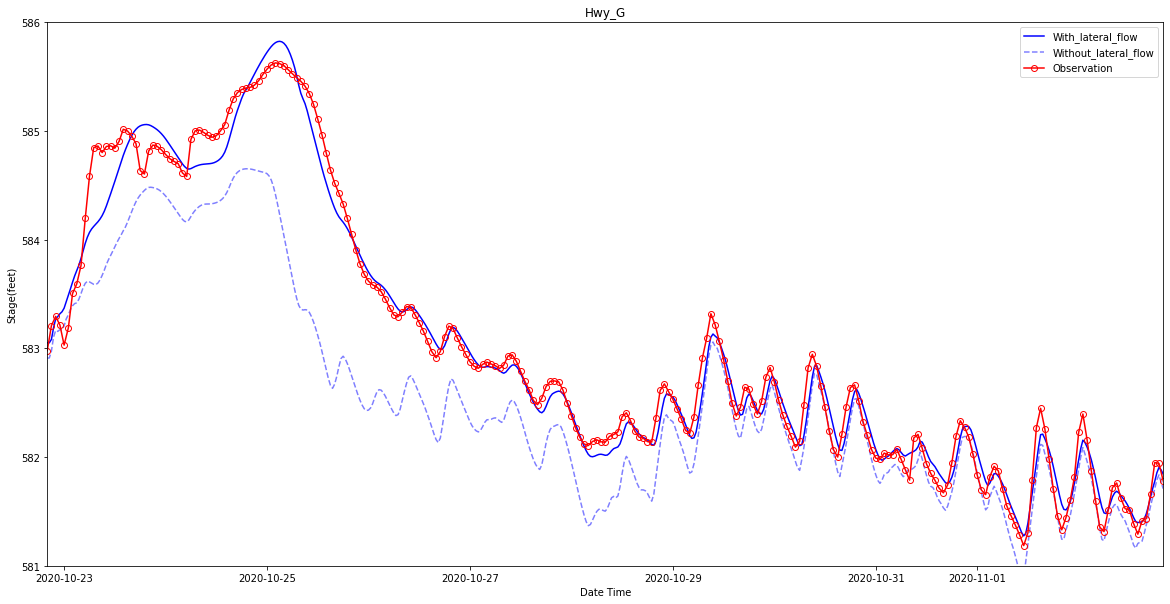

In [8]:
# Hwy G 52450 for calibrated results
# dss file folder
folder = r"d:\East_river_flood_resilience\Greenbay\HEC-RAS\Calibration\full_east_river"
dss_name = "full_east_river_051.dss" # dss file name
dss_name_nobase = "full_east_river_051_nobase.dss" # dss with no base flow
fid = HecDss.Open(folder + "//" + dss_name)
pathname = "/EAST MID_G/52450/STAGE/01OCT2020/30MIN/0515_CALIBRATE//EAST MID_G/52450/STAGE/01NOV2020/30MIN/0515_CALIBRATE/"
fid_nobase = HecDss.Open(folder + "//" + dss_name_nobase)
pathname_nobase = "/EAST MID_G/52450/STAGE/01OCT2020/30MIN/PLAN 57//EAST MID_G/52450/STAGE/01NOV2020/30MIN/PLAN 57/"
startDate = "22OCT2020 00:00:00"
endDate = "03NOV2020 00:00:00"
y_min = 581
y_max = 586
gage_data, simulations = stage_comparison("Hwy_G", fid, pathname, fid_nobase, pathname_nobase, startDate, endDate, y_min, y_max)

<Figure size 1440x432 with 0 Axes>

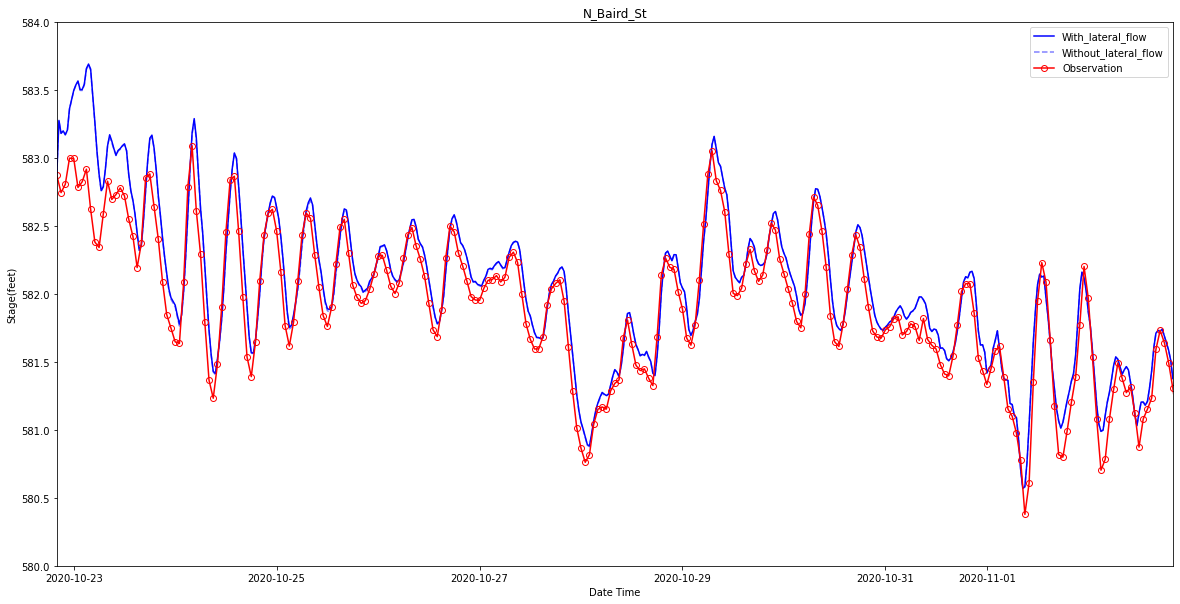

In [11]:
# N Baird St 52450 for calibrated results
# dss file folder
folder = r"d:\East_river_flood_resilience\Greenbay\HEC-RAS\Calibration\full_east_river"
dss_name = "full_east_river_051.dss" # dss file name
dss_name_nobase = "full_east_river_051_nobase.dss" # dss with no base flow
fid = HecDss.Open(folder + "//" + dss_name)
pathname = "/EAST BAIRD_FOX/7016/STAGE/01OCT2020/30MIN/0515_CALIBRATE//EAST BAIRD_FOX/7016/STAGE/01NOV2020/30MIN/0515_CALIBRATE/"
fid_nobase = HecDss.Open(folder + "//" + dss_name_nobase)
pathname_nobase = "/EAST BAIRD_FOX/7016/STAGE/01OCT2020/30MIN/PLAN 57//EAST BAIRD_FOX/7016/STAGE/01NOV2020/30MIN/PLAN 57/"
startDate = "22OCT2020 00:00:00"
endDate = "03NOV2020 00:00:00"
y_min = 580
y_max = 584
gage_data, simulations = stage_comparison("N_Baird_St", fid, pathname, fid_nobase, pathname_nobase, startDate, endDate, y_min, y_max)

<Figure size 1440x432 with 0 Axes>

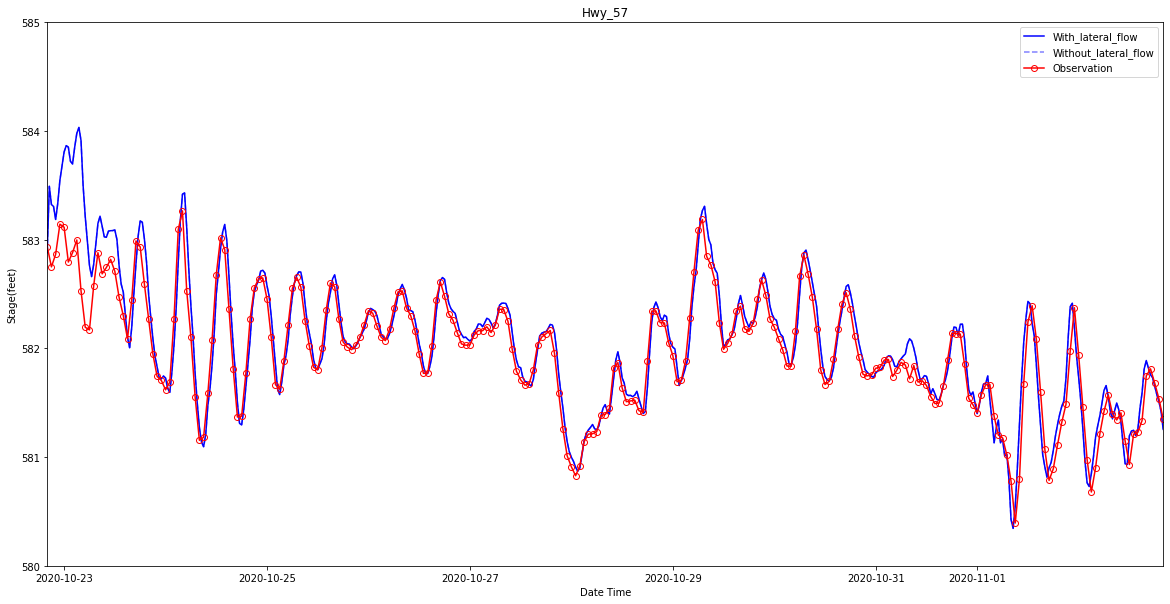

In [13]:
# Hwy 57 1163 for calibrated results
# dss file folder
folder = r"d:\East_river_flood_resilience\Greenbay\HEC-RAS\Calibration\full_east_river"
dss_name = "full_east_river_051.dss" # dss file name
dss_name_nobase = "full_east_river_051_nobase.dss" # dss with no base flow
fid = HecDss.Open(folder + "//" + dss_name)
pathname = "/EAST BAIRD_FOX/1163/STAGE/01OCT2020/30MIN/0515_CALIBRATE//EAST BAIRD_FOX/1163/STAGE/01NOV2020/30MIN/0515_CALIBRATE/"
fid_nobase = HecDss.Open(folder + "//" + dss_name_nobase)
pathname_nobase = "/EAST BAIRD_FOX/1163/STAGE/01OCT2020/30MIN/PLAN 57//EAST BAIRD_FOX/1163/STAGE/01NOV2020/30MIN/PLAN 57/"
startDate = "22OCT2020 00:00:00"
endDate = "03NOV2020 00:00:00"
y_min = 580
y_max = 585
gage_data, simulations = stage_comparison("Hwy_57", fid, pathname, fid_nobase, pathname_nobase, startDate, endDate, y_min, y_max)

In [23]:
# compare base flow and no base flow
# gage_name: gage name for extracting observations
# fid：dss file with base flow
# pathname: pathname for crosssection in the dss file
# fid_nobase: dss file without base flow
# y_min: y axis min
# y_max: y axis max
def flow_comparison(gage_name, fid, pathname, fid_nobase, pathname_nobase, startDate, endDate, y_min, y_max):
    # 提取observations
    # obs_folder = r"D:\East_river_flood_resilience\Greenbay\HEC-RAS\Unsteady_flow\Unsteady_flow_data\East_river_gage_oct_2020_0514"
    ax = plt.figure(figsize = (20, 6))
    # obs_loc = obs_folder + "\\" + gage_name + "_adjusted.csv"
    # gage_data = pd.read_csv(obs_loc)
    # create timestamp index
    # time_index = []
    # for i in range(gage_data.shape[0]):
    #     d = datetime.strptime(gage_data['Date_Time'][i], "%Y-%m-%d %H:%M:%S")
    #     time_index.append(d)
    # gage_data.index = time_index
    # resampled_gage = gage_data['Stage(ft)'].resample('1H').mean()
    # resampled_timestamp = resampled_gage.index
    #  //BAIRD/FLOW/01NOV2020/15MIN/RUN:OCT_22_EVENT/
    ts = fid.read_ts(pathname,window = (startDate, endDate), trim_missing = True)
    times = np.array(ts.pytimes)
    values = ts.values
    fid.close() # close DSS
    ts_nobase = fid_nobase.read_ts(pathname_nobase,window = (startDate, endDate), trim_missing = True)
    times_nobase = np.array(ts_nobase.pytimes)
    values_nobase = ts_nobase.values
    #
    simulations = pd.DataFrame()
    simulations['Time'] = times
    simulations['With baseflow (cfs)'] = values
    simulations['Without baseflow (cfs)'] = values_nobase
    plt.figure(figsize = (20, 10))
    plt.plot(times[~ts.nodata],values[~ts.nodata],"-",color = 'green', label = 'With_lateral_flow')
    plt.plot(times_nobase[~ts_nobase.nodata],values_nobase[~ts_nobase.nodata],"--", color = 'green', alpha = 0.5, label = 'Without_lateral_flow')
    plt.title(gage_name)
    # plt.plot(resampled_timestamp, resampled_gage, ls = '-', marker = "o", color = 'r', fillstyle = 'none', markeredgecolor = 'r', label= 'Observation')
    # plt.plot(resampled_timestamp, resampled_gage, color = 'r')
    plt.axis([datetime(2020,10,22,20,0), datetime(2020,11,2,20,0), y_min, y_max])
    plt.xlabel('Date Time')
    plt.ylabel('Discharge (cfs)')
    plt.legend()
    plt.show()
    # observation, stage with base, stage without base
    return gage_data, simulations 

<Figure size 1440x432 with 0 Axes>

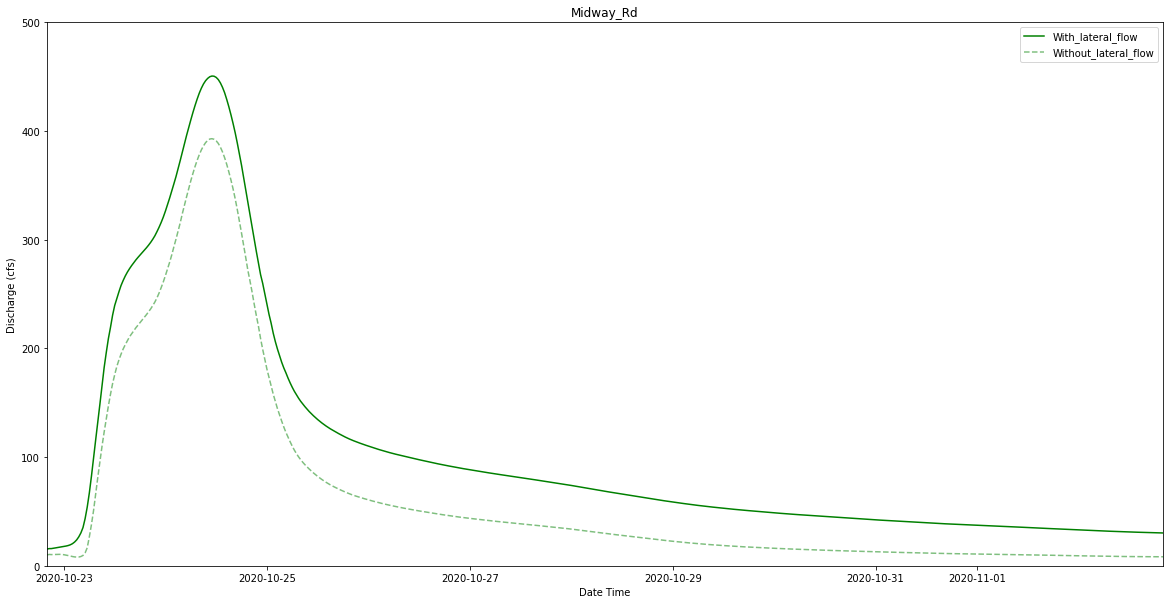

In [24]:
# Midway road 104916 for calibrated results
# dss file folder
folder = r"d:\East_river_flood_resilience\Greenbay\HEC-RAS\Calibration\full_east_river"
dss_name = "full_east_river_051.dss" # dss file name
dss_name_nobase = "full_east_river_051_nobase.dss" # dss with no base flow
fid = HecDss.Open(folder + "//" + dss_name)
pathname = "/EAST MID_G/104916/FLOW/01OCT2020/30MIN/0515_CALIBRATE//EAST MID_G/104916/FLOW/01NOV2020/30MIN/0515_CALIBRATE/"
fid_nobase = HecDss.Open(folder + "//" + dss_name_nobase)
pathname_nobase = "/EAST MID_G/104916/FLOW/01OCT2020/30MIN/PLAN 57//EAST MID_G/104916/FLOW/01NOV2020/30MIN/PLAN 57/"
startDate = "22OCT2020 00:00:00"
endDate = "03NOV2020 00:00:00"
y_min = 0
y_max = 500
gage_data, simulations = flow_comparison("Midway_Rd", fid, pathname, fid_nobase, pathname_nobase, startDate, endDate, y_min, y_max)

<Figure size 1440x432 with 0 Axes>

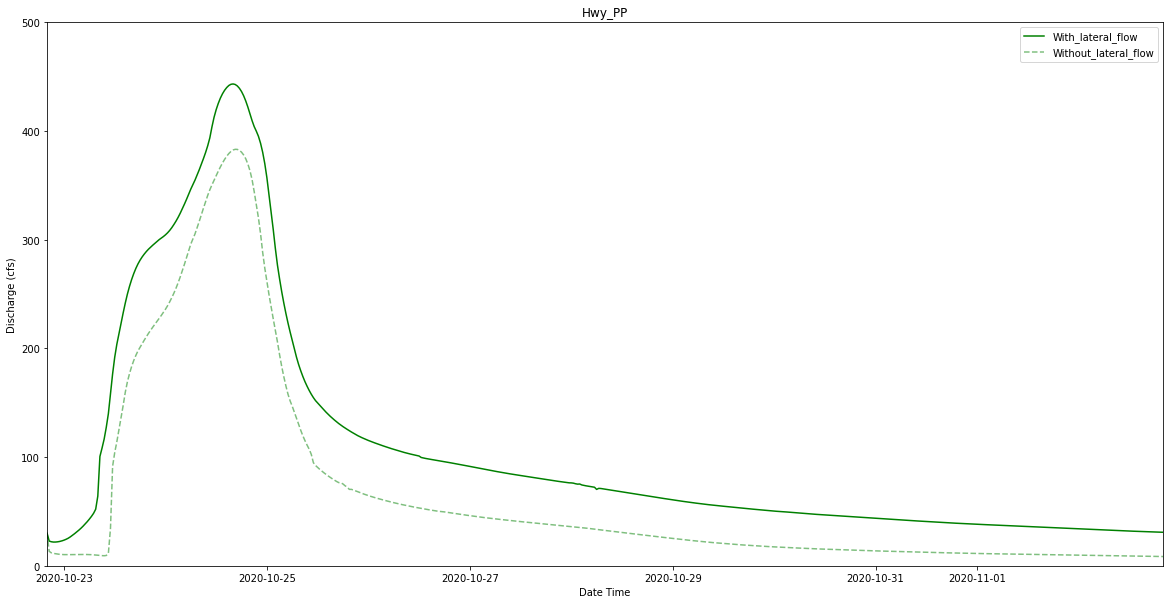

In [28]:
# Hwy PP 80741 for calibrated results
# dss file folder
folder = r"d:\East_river_flood_resilience\Greenbay\HEC-RAS\Calibration\full_east_river"
dss_name = "full_east_river_051.dss" # dss file name
dss_name_nobase = "full_east_river_051_nobase.dss" # dss with no base flow
fid = HecDss.Open(folder + "//" + dss_name)
pathname = "/EAST MID_G/80741/FLOW/01OCT2020/30MIN/0515_CALIBRATE//EAST MID_G/80741/FLOW/01NOV2020/30MIN/0515_CALIBRATE/"
fid_nobase = HecDss.Open(folder + "//" + dss_name_nobase)
pathname_nobase = "/EAST MID_G/80741/FLOW/01OCT2020/30MIN/PLAN 57//EAST MID_G/80741/FLOW/01NOV2020/30MIN/PLAN 57/"
startDate = "22OCT2020 00:00:00"
endDate = "03NOV2020 00:00:00"
y_min = 0
y_max = 500
gage_data, simulations = flow_comparison("Hwy_PP", fid, pathname, fid_nobase, pathname_nobase, startDate, endDate, y_min, y_max)

<Figure size 1440x432 with 0 Axes>

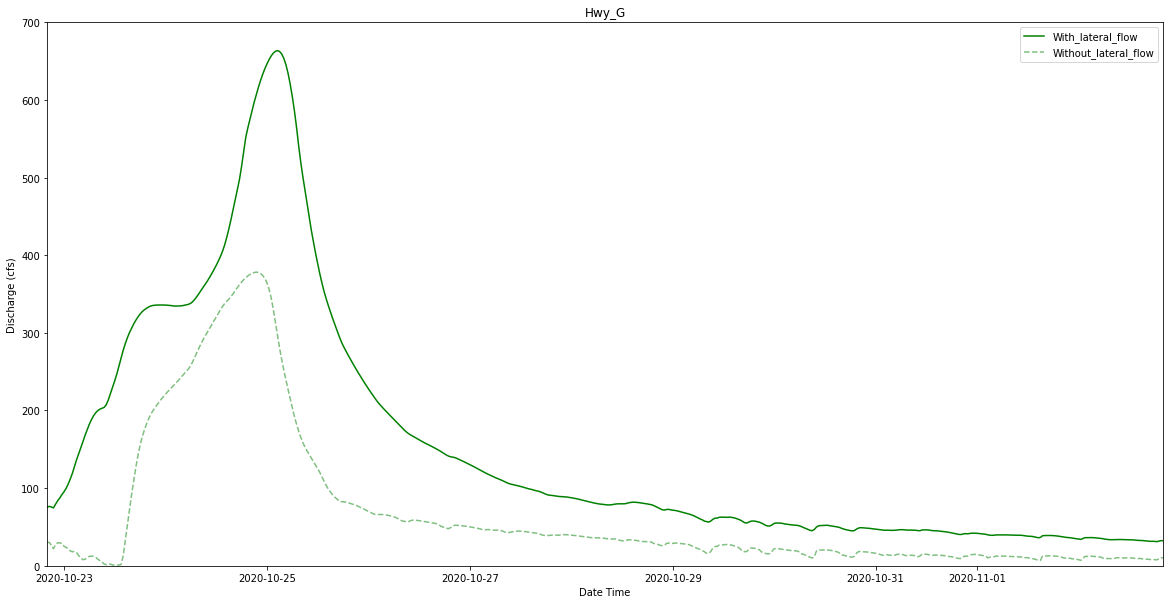

In [29]:
# Hwy G 52450 for calibrated results
# dss file folder
folder = r"d:\East_river_flood_resilience\Greenbay\HEC-RAS\Calibration\full_east_river"
dss_name = "full_east_river_051.dss" # dss file name
dss_name_nobase = "full_east_river_051_nobase.dss" # dss with no base flow
fid = HecDss.Open(folder + "//" + dss_name)
pathname = "/EAST MID_G/52450/FLOW/01OCT2020/30MIN/0515_CALIBRATE//EAST MID_G/52450/FLOW/01NOV2020/30MIN/0515_CALIBRATE/"
fid_nobase = HecDss.Open(folder + "//" + dss_name_nobase)
pathname_nobase = "/EAST MID_G/52450/FLOW/01OCT2020/30MIN/PLAN 57//EAST MID_G/52450/FLOW/01NOV2020/30MIN/PLAN 57/"
startDate = "22OCT2020 00:00:00"
endDate = "03NOV2020 00:00:00"
y_min = 0
y_max = 700
gage_data, simulations = flow_comparison("Hwy_G", fid, pathname, fid_nobase, pathname_nobase, startDate, endDate, y_min, y_max)

<Figure size 1440x432 with 0 Axes>

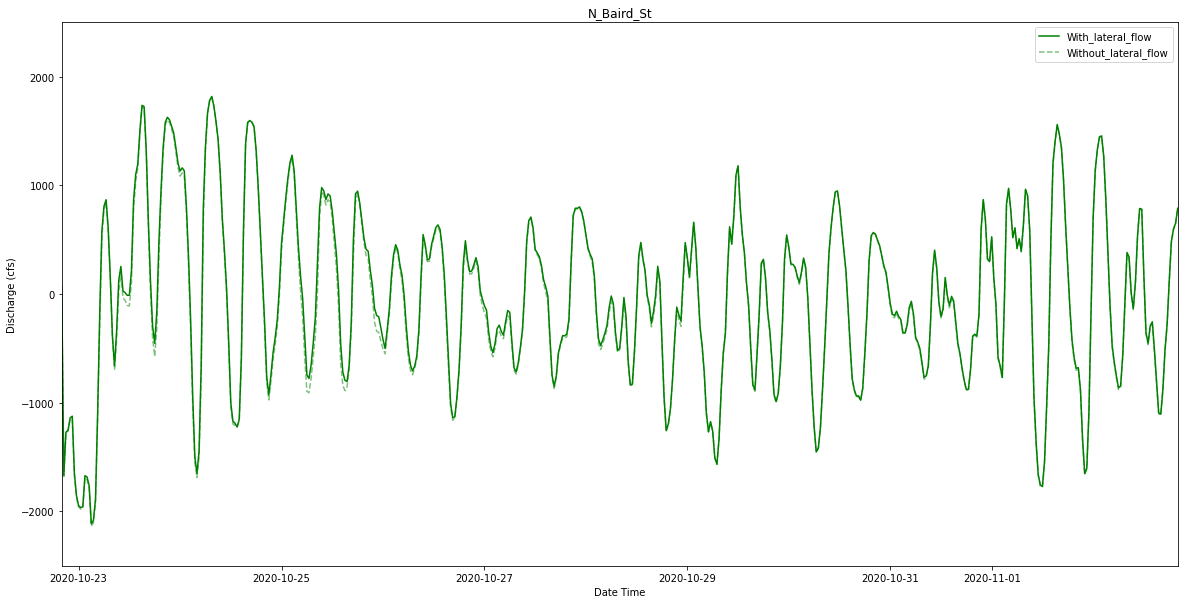

In [31]:
# N Baird St 52450 for calibrated results
# dss file folder
folder = r"d:\East_river_flood_resilience\Greenbay\HEC-RAS\Calibration\full_east_river"
dss_name = "full_east_river_051.dss" # dss file name
dss_name_nobase = "full_east_river_051_nobase.dss" # dss with no base flow
fid = HecDss.Open(folder + "//" + dss_name)
pathname = "/EAST BAIRD_FOX/7016/FLOW/01OCT2020/30MIN/0515_CALIBRATE//EAST BAIRD_FOX/7016/FLOW/01NOV2020/30MIN/0515_CALIBRATE/"
fid_nobase = HecDss.Open(folder + "//" + dss_name_nobase)
pathname_nobase = "/EAST BAIRD_FOX/7016/FLOW/01OCT2020/30MIN/PLAN 57//EAST BAIRD_FOX/7016/FLOW/01NOV2020/30MIN/PLAN 57/"
startDate = "22OCT2020 00:00:00"
endDate = "03NOV2020 00:00:00"
y_min = -2500
y_max = 2500
gage_data, simulations = flow_comparison("N_Baird_St", fid, pathname, fid_nobase, pathname_nobase, startDate, endDate, y_min, y_max)

<Figure size 1440x432 with 0 Axes>

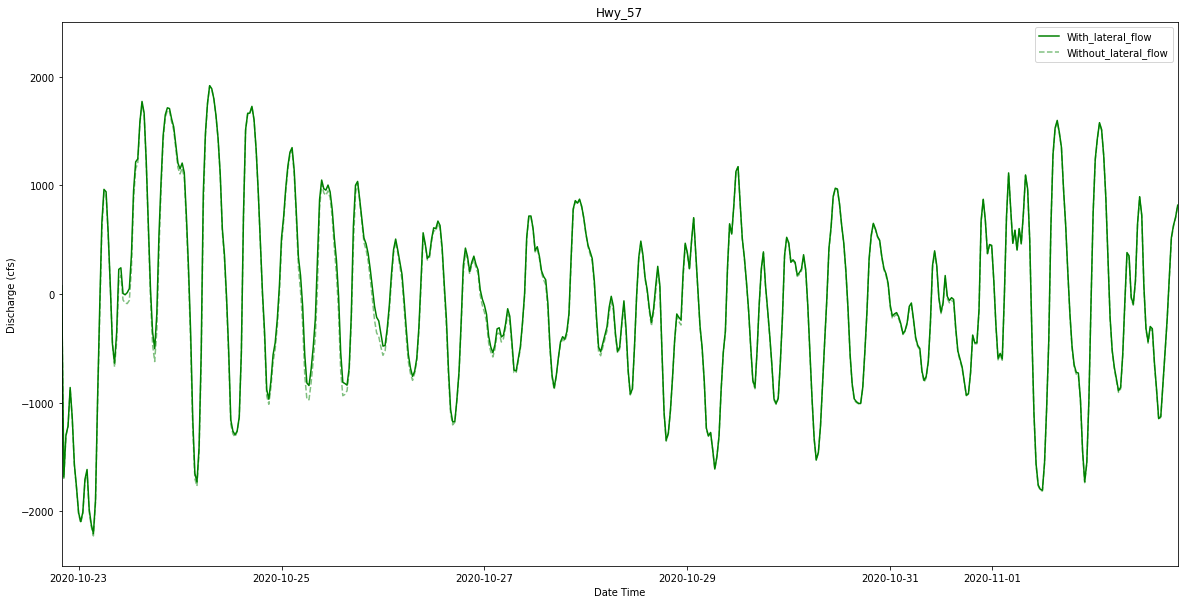

In [34]:
# Hwy 57 1163 for calibrated results
# dss file folder
folder = r"d:\East_river_flood_resilience\Greenbay\HEC-RAS\Calibration\full_east_river"
dss_name = "full_east_river_051.dss" # dss file name
dss_name_nobase = "full_east_river_051_nobase.dss" # dss with no base flow
fid = HecDss.Open(folder + "//" + dss_name)
pathname = "/EAST BAIRD_FOX/1163/FLOW/01OCT2020/30MIN/0515_CALIBRATE//EAST BAIRD_FOX/1163/FLOW/01NOV2020/30MIN/0515_CALIBRATE/"
fid_nobase = HecDss.Open(folder + "//" + dss_name_nobase)
pathname_nobase = "/EAST BAIRD_FOX/1163/FLOW/01OCT2020/30MIN/PLAN 57//EAST BAIRD_FOX/1163/FLOW/01NOV2020/30MIN/PLAN 57/"
startDate = "22OCT2020 00:00:00"
endDate = "03NOV2020 00:00:00"
y_min = -2500
y_max = 2500
gage_data, simulations = flow_comparison("Hwy_57", fid, pathname, fid_nobase, pathname_nobase, startDate, endDate, y_min, y_max)

In [13]:
fid = HecDss.Open(folder + "//" + dss_name)

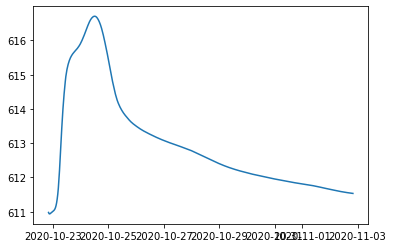

In [14]:
fid = HecDss.Open(folder + "//" + dss_name)
ts = fid.read_ts(pathname,window = (startDate, endDate), trim_missing = True)
# fid.read_ts(pathname, window = (startDate, endDate), trim_missing=True)
# extract time 
times = np.array(ts.pytimes)
values = ts.values
plt.plot(times[~ts.nodata],values[~ts.nodata],"-")
plt.show()
fid.close()

In [7]:
# read pathname catlog
# / /BAIRD/FLOW/TIME/15MIN/RUN:OCT_22_EVENT
pathname_pattern = "//*/FLOW/01OCT2020/*/*/*/" # extract flow event
with Open(folder + "//" + dss_name) as fid:
    path_list = fid.getPathnameList(pathname_pattern, sort = 1)
    print("list = %r" % path_list)

list = []


In [67]:
startDate = "22OCT2020 00:15:00"
endDate = "03NOV2020 23:45:00"
# export the discharge value
discharge = pd.DataFrame()
max_flow = pd.DataFrame()
# read baird discharge 
name = path_list[0].split('/')[2]
fid = HecDss.Open(folder + "//" + dss_name)
ts = fid.read_ts(path_list[0], window = (startDate, endDate), trim_missing = False)
# fid.read_ts(pathname, window = (startDate, endDate), trim_missing=True)
# extract time 
times = np.array(ts.pytimes)
values = ts.values
# plt.plot(times[~ts.nodata],values[~ts.nodata],"o")
# plt.show()
fid.close()
discharge[name] = values # save discharge value to data frame
max_flow[name] = np.array([values.max()]) # find the peak discharge
print("{0} has peak discharge of {1} cfs".format(name, values.max()))

BAIRD has peak discharge of 1293.8719482421875 cfs


In [68]:
startDate = "22OCT2020 00:15:00"
endDate = "03NOV2020 23:45:00"
# output folder
output_folder = r"D:\East_river_flood_resilience\Greenbay\HEC-HMS\East_river_basin_model_0410\HEC-HMS\East_river_cali_output"
# loop through
discharge = pd.DataFrame()
fid = HecDss.Open(folder + "//" + dss_name) # open dss file
for path in path_list:
    name = path.split("/")[2] # extract basin/river/junction name
    ts = fid.read_ts(path, trim_missing = True) # read path line
    # fid.read_ts(pathname, window = (startDate, endDate), trim_missing=True)
    # extract time 
    times = np.array(ts.pytimes)
    values = ts.values # extract discharge value
    # plt.plot(times[~ts.nodata],values[~ts.nodata],"o")
    # plt.show()
    discharge[name] = values # save discharge value to data frame
    # max_flow[name] = np.array([values.max()]) # find the peak discharge
    print("{0} has peak discharge of {1} cfs".format(name, values.max()))
discharge.index = times # use times as the discharge index
fid.close() # close dss file
discharge.to_csv(output_folder + "\\" + "discharge.csv")

BAIRD has peak discharge of 1293.8719482421875 cfs
BAIRD_57 has peak discharge of 54.12932586669922 cfs
BOWER has peak discharge of 2186.865234375 cfs
BOWER_WILLOW has peak discharge of 189.72776794433594 cfs
G_GAGE_POINT has peak discharge of 2683.97119140625 cfs
J100 has peak discharge of 2530.44287109375 cfs
J105 has peak discharge of 3124.21826171875 cfs
J93 has peak discharge of 2248.538818359375 cfs
N_BAIRD_GAGE_POINT has peak discharge of 3458.803955078125 cfs
OUTLET1 has peak discharge of 3465.930908203125 cfs
PP_BOWER has peak discharge of 415.5506286621094 cfs
PP_GAGE_POINT has peak discharge of 450.6954345703125 cfs
R10 has peak discharge of 3458.773681640625 cfs
R150 has peak discharge of 450.68023681640625 cfs
R20 has peak discharge of 3154.59765625 cfs
R560 has peak discharge of 417.12567138671875 cfs
R70 has peak discharge of 2683.97119140625 cfs
USERPOINT3 has peak discharge of 418.170166015625 cfs
USERPOINT4 has peak discharge of 557.9859008789062 cfs
WILLOW has peak d

In [69]:
# extract peak discharge
peak_discharge = discharge.max(axis = 0)

In [70]:
# extract precipi_cum
# extract precipi_excess_cum
# extract precipi_loss

In [71]:
# function that extract variables from DSS
# input: variable name: FLOW, PRECIP-LOSS-CUM, PRECIP-EXCESS-CUM, PRECIP-CUM
# start_time: 01OCT2020
# start_Date and end_Date: the time period you want to clip
def variable_extraction(var_name, start_time, startDate, endDate, output_folder):
    pathname_pattern = "//*/"+ var_name +"/" + start_time +"/*/*/*/" # extract flow event
    with Open(folder + "//" + dss_name) as fid:
        path_list = fid.getPathnameList(pathname_pattern, sort = 1) # get path_list
        # print("list = %r" % path_list)
    # loop through path_list
    data_store = pd.DataFrame()
    max_store = pd.DataFrame()
    fid = HecDss.Open(folder + "//" + dss_name) # open dss file
    for path in path_list:
        name = path.split("/")[2] # extract basin/river/junction name
        ts = fid.read_ts(path, window = (startDate, endDate), trim_missing = False) # read path line
        # fid.read_ts(pathname, window = (startDate, endDate), trim_missing=True)
        # extract time 
        times = np.array(ts.pytimes)
        values = ts.values # extract discharge value
        # plt.plot(times[~ts.nodata],values[~ts.nodata],"o")
        # plt.show()
        data_store[name] = values # save discharge value to data frame
        max_store[name] = np.array([values.max()]) # find the peak discharge
        print("{0} has peak {1} of {2}".format(name, var_name, values.max()))
    data_store.index = times # use times as the discharge index
    fid.close() # close dss file
    data_store.to_csv(output_folder + "\\" + var_name+ ".csv")
    return max_store

In [72]:
# output folder
output_folder = r"D:\East_river_flood_resilience\Greenbay\HEC-HMS\East_river_basin_model_0410\HEC-HMS\East_river_cali_output"
var_name = 'FLOW'
start_time = "01OCT2020"
startDate = "22OCT2020 00:00:00"
endDate = "03NOV2020 23:00:00"
max_discharge = variable_extraction(var_name, start_time, startDate, endDate, output_folder)

BAIRD has peak FLOW of 1293.8719482421875
BAIRD_57 has peak FLOW of 54.12932586669922
BOWER has peak FLOW of 2186.865234375
BOWER_WILLOW has peak FLOW of 189.72776794433594
G_GAGE_POINT has peak FLOW of 2683.97119140625
J100 has peak FLOW of 2530.44287109375
J105 has peak FLOW of 3124.21826171875
J93 has peak FLOW of 2248.538818359375
N_BAIRD_GAGE_POINT has peak FLOW of 3458.803955078125
OUTLET1 has peak FLOW of 3465.930908203125
PP_BOWER has peak FLOW of 415.5506286621094
PP_GAGE_POINT has peak FLOW of 450.6954345703125
R10 has peak FLOW of 3458.773681640625
R150 has peak FLOW of 450.68023681640625
R20 has peak FLOW of 3154.59765625
R560 has peak FLOW of 417.12567138671875
R70 has peak FLOW of 2683.97119140625
USERPOINT3 has peak FLOW of 418.170166015625
USERPOINT4 has peak FLOW of 557.9859008789062
WILLOW has peak FLOW of 340.8111877441406
WILLOW_BAIRD has peak FLOW of 174.15866088867188
WILLOW_GAGE_POINT has peak FLOW of 3154.59765625
ZZ_GAGE_POINT has peak FLOW of 417.12646484375
Z

In [73]:
# output folder
# for PRECIP-LOSS-CUM
output_folder = r"D:\East_river_flood_resilience\Greenbay\HEC-HMS\East_river_basin_model_0410\HEC-HMS\East_river_cali_output"
var_name = 'PRECIP-LOSS-CUM'
start_time = "01OCT2020"
max_preci_loss = variable_extraction(var_name, start_time, startDate, endDate, output_folder)

BAIRD has peak PRECIP-LOSS-CUM of 1.6525764465332031
BAIRD_57 has peak PRECIP-LOSS-CUM of 0.36101141571998596
BOWER has peak PRECIP-LOSS-CUM of 1.7118653059005737
BOWER_WILLOW has peak PRECIP-LOSS-CUM of 1.0814353227615356
PP_BOWER has peak PRECIP-LOSS-CUM of 1.8277087211608887
WILLOW has peak PRECIP-LOSS-CUM of 1.0706050395965576
WILLOW_BAIRD has peak PRECIP-LOSS-CUM of 0.7943903207778931
ZZ_PP has peak PRECIP-LOSS-CUM of 1.8861799240112305
ZZ_UPSTREAM has peak PRECIP-LOSS-CUM of 2.690861701965332


In [74]:
# output folder
# for PRECIP-LOSS-CUM
output_folder = r"D:\East_river_flood_resilience\Greenbay\HEC-HMS\East_river_basin_model_0410\HEC-HMS\East_river_cali_output"
var_name = 'PRECIP-EXCESS-CUM'
start_time = "01OCT2020"
max_preci_excess = variable_extraction(var_name, start_time, startDate, endDate, output_folder)

BAIRD has peak PRECIP-EXCESS-CUM of 1.717423439025879
BAIRD_57 has peak PRECIP-EXCESS-CUM of 3.008988618850708
BOWER has peak PRECIP-EXCESS-CUM of 1.6581346988677979
BOWER_WILLOW has peak PRECIP-EXCESS-CUM of 2.288564682006836
PP_BOWER has peak PRECIP-EXCESS-CUM of 1.542291283607483
WILLOW has peak PRECIP-EXCESS-CUM of 2.2993948459625244
WILLOW_BAIRD has peak PRECIP-EXCESS-CUM of 2.5756096839904785
ZZ_PP has peak PRECIP-EXCESS-CUM of 1.4838199615478516
ZZ_UPSTREAM has peak PRECIP-EXCESS-CUM of 0.6791382431983948


In [75]:
# output folder
# for PRECIP-LOSS-CUM
output_folder = r"D:\East_river_flood_resilience\Greenbay\HEC-HMS\East_river_basin_model_0410\HEC-HMS\East_river_cali_output"
var_name = 'PRECIP-CUM'
start_time = "01OCT2020"
max_preci = variable_extraction(var_name, start_time, startDate, endDate, output_folder)

BAIRD has peak PRECIP-CUM of 3.369999885559082
BAIRD_57 has peak PRECIP-CUM of 3.369999885559082
BOWER has peak PRECIP-CUM of 3.369999885559082
BOWER_WILLOW has peak PRECIP-CUM of 3.369999885559082
PP_BOWER has peak PRECIP-CUM of 3.369999885559082
WILLOW has peak PRECIP-CUM of 3.369999885559082
WILLOW_BAIRD has peak PRECIP-CUM of 3.369999885559082
ZZ_PP has peak PRECIP-CUM of 3.369999885559082
ZZ_UPSTREAM has peak PRECIP-CUM of 3.369999885559082


In [76]:
# extract maximum precipitation, maximum excess precipitation, maximum loss
summary_table = pd.DataFrame()
summary_table['basin_name'] = max_preci.T.index.values
summary_table['max_preci'] = max_preci.T.iloc[:,0].values
summary_table['max_preci_excess'] = max_preci_excess.T.iloc[:,0].values
summary_table['max_preci_loss'] = max_preci_loss.T.iloc[:,0].values
# summary_table['max_discharge'] = max_discharge.T.iloc[:,0].values

In [77]:
summary_table

,basin_name,max_preci,max_preci_excess,max_preci_loss
0,BAIRD,3.37,1.717423,1.652576
1,BAIRD_57,3.37,3.008989,0.361011
2,BOWER,3.37,1.658135,1.711865
3,BOWER_WILLOW,3.37,2.288565,1.081435
4,PP_BOWER,3.37,1.542291,1.827709
5,WILLOW,3.37,2.299395,1.070605
6,WILLOW_BAIRD,3.37,2.575610,0.794390
7,ZZ_PP,3.37,1.483820,1.886180
8,ZZ_UPSTREAM,3.37,0.679138,2.690862


In [78]:
peak_discharge = pd.DataFrame()
peak_discharge['peak_discharge'] = max_discharge.T.iloc[:,0].values
peak_discharge['basin_name'] = max_discharge.T.index.values

In [79]:
summary_table = summary_table.merge(peak_discharge, on = "basin_name")

In [80]:
summary_table.to_csv(output_folder + "\\" + "basin_summary_0429.csv", index = False) 